## AB Tests

### 1. Оценка результатов AB теста

В данном задании вам требуется оценить результаты AB теста. Даны результаты на контрольной и тестовой группе после проведения AB теста.
Помимо показателей целевой переменной, вам даны также несколько фичей, которые являются характеристиками объектов. Даны целевые показатели (y) и принадлежность к целевой группе (W).

</u>Задача:</u>
1. Проверьте подходящую для данных гипотезу о равенстве средних в выборках
2. Каков treatment effect нашего воздействия? (ATE) 
3. Примените известные вам методы оценки ATE с учетом особенностей данных.
4. Проанализируйте, сравните результаты применения различных методов.
5. В явном виде выпишите выводы.

</i>Примечание: предположения о рандомизированном эксперименте нуждаются в проверке - независимость treatment от объектов не гарантирована. Все предположения выписывайте явно.</i> 

Для данной задачи используется dataset:  dataset_part1_students.csv

### 2. Оценка результатов AB теста с показателями до начала эксперимента

Необходимо как и ранее оценить результаты AB теста, а именно ATE. Вы располагаете результатами до и после проведения теста (y_0 и y_1), а также вам дан treatment assignment (W). 

Необходимо: 
1. Проверить все требуемые гипотезы
2. Оценить ATE подходящим для этого случая методом (примените несколько методов)
3. Сравнить и проанализировать результаты оценок
4. Явно выписать выводы.

Как и прежде, все предположения должны быть указаны. Визуализация результатов приветствуется.

dataset_part2_students.csv

### 3. Построение uplift модели по результатам AB теста.

Вам даны результаты AB теста для модели конверсии клиента в продукте (conversion). Конверсия может принимать значения 1 или 0, что значит - клиент подключил услугу, либо не подключил соответственно.

Задача:
1. Оцените ATE по данным.
2. Оцените CATE для каждого наблюдения.
3. Проставьте рекомендации к воздействию на каждый объект.
4. Какая ожидаемая конверсия при оптимальном воздействии?
5. Все выводы, предпосылки и методы представляйте в явном виде в ноутбуке.

Визуализация результатов также будет приветствоваться.

dataset_part3_students.csv

In [1]:
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from causalinference import CausalModel

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu

# 1. Проверьте подходящую для данных гипотезу о равенстве средних в выборках

In [3]:
df_1 = pd.read_csv('dataset_part1_students.csv', sep = ';')
df_2 = pd.read_csv('dataset_part2_students.csv', sep = ';')
df_3 = pd.read_csv('dataset_part3_students.csv', sep = ';')

In [4]:
df_1.shape

(20000, 12)

In [5]:
df_1.head()

,y,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,-1.459404,0.0,0.986277,0.873392,0.509746,0.271836,0.336919,0.216954,0.276477,0.343316,0.862159,0.156700
1,-1.694174,0.0,0.140887,0.757080,0.736325,0.355663,0.341093,0.666803,0.217101,0.561427,0.124179,0.319736
2,5.378374,0.0,0.953214,0.137357,0.569413,0.975665,0.503367,0.667664,0.034191,0.456119,0.155851,0.476049
3,2.188189,1.0,0.169702,0.896258,0.373394,0.379693,0.858317,0.646061,0.583462,0.668350,0.177793,0.849248
4,2.862696,1.0,0.442373,0.831468,0.763921,0.919691,0.070573,0.156165,0.636894,0.555696,0.191929,0.425656


In [4]:
data_1 = df_1[df_1['W'] == 1]
data_0 = df_1[df_1['W'] == 0]

In [5]:
data_1.head()

,y,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
3,2.188189,1.0,0.169702,0.896258,0.373394,0.379693,0.858317,0.646061,0.583462,0.668350,0.177793,0.849248
4,2.862696,1.0,0.442373,0.831468,0.763921,0.919691,0.070573,0.156165,0.636894,0.555696,0.191929,0.425656
5,3.051907,1.0,0.513420,0.269378,0.599020,0.220174,0.300862,0.048394,0.564320,0.936032,0.803028,0.697305
6,3.094696,1.0,0.461384,0.662435,0.749666,0.531455,0.482810,0.029274,0.894283,0.831532,0.737843,0.898497
7,0.530055,1.0,0.230734,0.179961,0.614158,0.016669,0.299322,0.668541,0.952552,0.816207,0.077862,0.134613


In [6]:
stat, p = ttest_ind(data_1.iloc[:,0],  data_0.iloc[:,0])

In [7]:
stat

9.332400850259313

In [8]:
p

1.1400916649505329e-20

In [ ]:
# отвергаем H0

#  Каков treatment effect нашего воздействия? (ATE) 

In [9]:
y_1 = data_1.iloc[:,0]
y_0 = data_0.iloc[:,0]

In [10]:
ATE = y_1.mean() - y_0.mean()
ATE

0.4001031055444413

In [11]:
#Типа воздействие было с каким то эффектом

In [12]:
y_1.shape

(10446,)

In [13]:
y_0.shape

(9554,)

# Примените известные вам методы оценки ATE с учетом особенностей данных.

In [18]:
#random

In [14]:
summa = 0
for i in range (10000):
    value = y_1.sample(n = 9000).mean() - y_0.sample(n = 9000).mean() 
    summa+=value
print(summa/10000)

0.399987387240217


In [18]:
cm = CausalModel(
    Y = df_1['y'].values,
    D = df_1['W'].values, 
    X = df_1.iloc[:,2:].values)

cm.est_via_ols(adj=1)
OLS = cm.estimates

print(cm.estimates) #линейная регрессия


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610



In [16]:
cm = CausalModel(
    Y = df_1['y'].values,
    D = df_1['W'].values, 
    X = df_1.iloc[:,2:].values)

cm.est_via_matching()

Matching = cm.estimates

print(cm.estimates)#оценка соответствия


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.478      0.076      6.266      0.000      0.329      0.628
           ATC      0.388      0.090      4.330      0.000      0.212      0.563
           ATT      0.561      0.090      6.247      0.000      0.385      0.737



In [19]:
cm = CausalModel(
    Y = df_1['y'].values,
    D = df_1['W'].values, 
    X = df_1.iloc[:,2:].values)

cm.est_propensity_s()
cm.stratify_s()
cm.est_via_blocking()

Blocking = cm.estimates

print(cm.estimates)


Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.515      0.056      9.264      0.000      0.406      0.624
           ATC      0.412      0.066      6.215      0.000      0.282      0.542
           ATT      0.609      0.066      9.195      0.000      0.479      0.739



C:\Users\ketmu\anaconda3\lib\site-packages\causalinference\estimators\ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]


# Проанализируйте, сравните результаты применения различных методов.

In [20]:
print(OLS)
print(Matching)
print(Blocking)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.513      0.049     10.458      0.000      0.417      0.610


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.478      0.076      6.266      0.000      0.329      0.628
           ATC      0.388      0.090      4.330      0.000      0.212      0.563
           ATT      0.561      0.090      6.247      0.000      0.385      0.737


Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.515      0.056      9.264      0.000      0.406      0

# В явном виде выпишите выводы.

In [ ]:
Blocking: разбиваем выборку на блоки по PS, затем оцениваем naïve ATE внутри каждого из блоков,
затем – взвешенно суммируем.

## 2

Необходимо как и ранее оценить результаты AB теста, а именно ATE. Вы располагаете результатами до и после проведения теста (y_0 и y_1), а также вам дан treatment assignment (W). 

Необходимо: 
1. Проверить все требуемые гипотезы
2. Оценить ATE подходящим для этого случая методом (примените несколько методов)
3. Сравнить и проанализировать результаты оценок
4. Явно выписать выводы.

Как и прежде, все предположения должны быть указаны. Визуализация результатов приветствуется.

dataset_part2_students.csv

In [55]:
df_2.head()

,y_1,y_0,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,5.887156,2.785060,1.0,0.605978,0.733369,0.138947,0.312673,0.997243,0.128162,0.178993,0.752925,0.662161,0.784310
1,2.232601,5.533515,0.0,0.096894,0.058571,0.962396,0.616557,0.086630,0.561272,0.616525,0.963843,0.574304,0.371161
2,0.144419,0.095546,1.0,0.452145,0.201850,0.569305,0.195096,0.583704,0.476313,0.517814,0.823099,0.732225,0.069056
3,-2.446425,3.590472,1.0,0.672129,0.643485,0.828014,0.204469,0.617489,0.617701,0.301069,0.871741,0.589654,0.981770
4,2.163090,1.365405,0.0,0.442232,0.126318,0.508831,0.431786,0.915940,0.709016,0.890655,0.588886,0.636830,0.342209


# Проверить все требуемые гипотезы

In [22]:
y = df_2['y_1'] - df_2['y_0']

In [23]:
df_2['y'] = y

In [56]:
df_2.head()

,y_1,y_0,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,y
0,5.887156,2.785060,1.0,0.605978,0.733369,0.138947,0.312673,0.997243,0.128162,0.178993,0.752925,0.662161,0.784310,3.102097
1,2.232601,5.533515,0.0,0.096894,0.058571,0.962396,0.616557,0.086630,0.561272,0.616525,0.963843,0.574304,0.371161,-3.300914
2,0.144419,0.095546,1.0,0.452145,0.201850,0.569305,0.195096,0.583704,0.476313,0.517814,0.823099,0.732225,0.069056,0.048874
3,-2.446425,3.590472,1.0,0.672129,0.643485,0.828014,0.204469,0.617489,0.617701,0.301069,0.871741,0.589654,0.981770,-6.036897
4,2.163090,1.365405,0.0,0.442232,0.126318,0.508831,0.431786,0.915940,0.709016,0.890655,0.588886,0.636830,0.342209,0.797684


In [25]:
data = df_2.iloc[:,2:12]

In [26]:
data.head()

,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9
0,1.0,0.605978,0.733369,0.138947,0.312673,0.997243,0.128162,0.178993,0.752925,0.662161
1,0.0,0.096894,0.058571,0.962396,0.616557,0.086630,0.561272,0.616525,0.963843,0.574304
2,1.0,0.452145,0.201850,0.569305,0.195096,0.583704,0.476313,0.517814,0.823099,0.732225
3,1.0,0.672129,0.643485,0.828014,0.204469,0.617489,0.617701,0.301069,0.871741,0.589654
4,0.0,0.442232,0.126318,0.508831,0.431786,0.915940,0.709016,0.890655,0.588886,0.636830


In [40]:
data_2_1 = df_2[df_2['W'] == 1]
data_2_0 = df_2[df_2['W'] == 0]

In [41]:
data_2_1.head()

,y_1,y_0,W,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,y
0,5.887156,2.785060,1.0,0.605978,0.733369,0.138947,0.312673,0.997243,0.128162,0.178993,0.752925,0.662161,0.784310,3.102097
2,0.144419,0.095546,1.0,0.452145,0.201850,0.569305,0.195096,0.583704,0.476313,0.517814,0.823099,0.732225,0.069056,0.048874
3,-2.446425,3.590472,1.0,0.672129,0.643485,0.828014,0.204469,0.617489,0.617701,0.301069,0.871741,0.589654,0.981770,-6.036897
8,3.592016,3.985938,1.0,0.372296,0.275352,0.679556,0.581626,0.970199,0.415507,0.330489,0.966714,0.825899,0.305400,-0.393922
9,0.033735,2.688234,1.0,0.823278,0.556910,0.718501,0.879937,0.496010,0.512086,0.648545,0.343327,0.622637,0.464600,-2.654499


In [42]:
stat, p = ttest_ind(data_2_1.iloc[:,13],  data_2_0.iloc[:,13])

In [43]:
stat

9.118025905018952

In [44]:
p

9.12276266827303e-20

In [47]:
# p < 0.05 - отвергаем нулевую гипотезу о равенстве средних

In [67]:
stat_1, p_1 = stats.fligner(data_2_1.iloc[:,13], data_2_0.iloc[:,13])

In [68]:
stat_1

0.0003912182699424198

In [69]:
p_1

0.9842194800359902

In [ ]:
# p > 0.05 принимаем, что дисперсии выборок равны

In [73]:
stat_2, p_2 = mannwhitneyu(data_2_1.iloc[:,13],  data_2_0.iloc[:,13])

In [74]:
stat_2

11245141.0

In [75]:
p_2

9.177359384779589e-18

In [ ]:
#p < 0.05 распределения двух выборок не равны

# Оценить ATE подходящим для этого случая методом (примените несколько методов)

In [45]:
ATE_2 = data_2_1.iloc[:,13].mean() - data_2_0.iloc[:,13].mean()

In [46]:
ATE_2

0.5549047702971162

In [77]:
cm = CausalModel(
    Y = df_2['y'].values,
    D = df_2['W'].values, 
    X = df_2.iloc[:,3:12].values)

cm.est_via_ols(adj=1)
OLS_2 = cm.estimates

print(cm.estimates) #линейная регрессия


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.543      0.070      7.774      0.000      0.406      0.679



In [78]:
cm = CausalModel(
    Y = df_2['y'].values,
    D = df_2['W'].values, 
    X = df_2.iloc[:,3:12].values)

cm.est_via_matching()
Matching_2 = cm.estimates
print(cm.estimates)#оценка соответствия



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.557      0.109      5.104      0.000      0.343      0.771
           ATC      0.458      0.128      3.569      0.000      0.206      0.709
           ATT      0.648      0.128      5.055      0.000      0.397      0.899



In [79]:
cm = CausalModel(
    Y = df_2['y'].values,
    D = df_2['W'].values, 
    X = df_2.iloc[:,3:12].values)

cm.est_propensity_s()
cm.stratify_s()
cm.est_via_blocking()

Blocking_2 = cm.estimates

print(cm.estimates)


Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.528      0.078      6.734      0.000      0.374      0.681
           ATC      0.434      0.096      4.521      0.000      0.246      0.622
           ATT      0.613      0.091      6.763      0.000      0.435      0.790



#  Сравнить и проанализировать результаты оценок

In [81]:
print(OLS_2)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.543      0.070      7.774      0.000      0.406      0.679



In [88]:
print(Matching_2)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.557      0.109      5.104      0.000      0.343      0.771
           ATC      0.458      0.128      3.569      0.000      0.206      0.709
           ATT      0.648      0.128      5.055      0.000      0.397      0.899



In [89]:
print(Blocking_2)


Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.528      0.078      6.734      0.000      0.374      0.681
           ATC      0.434      0.096      4.521      0.000      0.246      0.622
           ATT      0.613      0.091      6.763      0.000      0.435      0.790



In [ ]:
#сравнение

# Явно выписать выводы.

Вам даны результаты AB теста для модели конверсии клиента в продукте (conversion). Конверсия может принимать значения 1 или 0, что значит - клиент подключил услугу, либо не подключил соответственно.

Задача:
1. Оцените ATE по данным.
2. Оцените CATE для каждого наблюдения.
3. Проставьте рекомендации к воздействию на каждый объект.
4. Какая ожидаемая конверсия при оптимальном воздействии?
5. Все выводы, предпосылки и методы представляйте в явном виде в ноутбуке.

Визуализация результатов также будет приветствоваться.

dataset_part3_students.csv# 

# Оцените ATE по данным.

In [4]:
df_3.head()

,treatment,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,conversion
0,control,0.034351,0.550725,-1.348524,-0.029591,0.499535,-0.412464,0.933588,-0.522954,-0.029591,...,-0.314573,-0.879456,0.640264,1.165722,0.570495,0.529443,0.227962,1.929914,0.798664,0
1,control,-1.059404,0.299404,0.220273,-1.569660,1.084204,-2.167118,1.216469,-0.744547,-1.569660,...,0.303664,1.080643,2.646483,-0.329690,1.725636,1.434649,-2.064893,0.188000,-1.134651,0
2,control,0.051934,2.338729,-0.341017,-1.099362,0.693090,-2.424267,1.572066,-0.212798,-1.099362,...,-0.083721,-1.981712,0.224777,2.038004,2.516398,2.324280,-3.182196,-0.888490,-1.402561,0
3,treatment,0.667770,0.539316,0.468719,-0.840885,-0.708331,0.126634,1.275854,-0.954919,-0.840885,...,-0.752011,-0.347319,-1.659402,-0.871980,-0.893513,-0.658078,-2.704997,-0.390745,-1.578004,1
4,control,-1.416158,2.486628,0.496402,-1.174618,2.738267,-4.756755,-0.180918,-1.281432,-1.174618,...,-1.198151,-0.232961,0.948875,1.210523,1.536723,1.548610,-0.926435,0.972459,-0.711251,0


In [5]:
X = df_3.iloc[:,1:23]

In [6]:
treatment = df_3['treatment']

In [7]:
y = df_3.iloc[:,23]

In [10]:
X

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22
0,0.034351,0.550725,-1.348524,-0.029591,0.499535,-0.412464,0.933588,-0.522954,-0.029591,-0.807218,...,-0.956947,-0.314573,-0.879456,0.640264,1.165722,0.570495,0.529443,0.227962,1.929914,0.798664
1,-1.059404,0.299404,0.220273,-1.569660,1.084204,-2.167118,1.216469,-0.744547,-1.569660,-0.460971,...,1.000000,0.303664,1.080643,2.646483,-0.329690,1.725636,1.434649,-2.064893,0.188000,-1.134651
2,0.051934,2.338729,-0.341017,-1.099362,0.693090,-2.424267,1.572066,-0.212798,-1.099362,-1.430502,...,0.943003,-0.083721,-1.981712,0.224777,2.038004,2.516398,2.324280,-3.182196,-0.888490,-1.402561
3,0.667770,0.539316,0.468719,-0.840885,-0.708331,0.126634,1.275854,-0.954919,-0.840885,0.408691,...,0.247038,-0.752011,-0.347319,-1.659402,-0.871980,-0.893513,-0.658078,-2.704997,-0.390745,-1.578004
4,-1.416158,2.486628,0.496402,-1.174618,2.738267,-4.756755,-0.180918,-1.281432,-1.174618,-0.243256,...,0.554053,-1.198151,-0.232961,0.948875,1.210523,1.536723,1.548610,-0.926435,0.972459,-0.711251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-1.309691,2.925832,-0.584101,-1.232931,2.601140,-4.943288,0.416758,-0.083626,-1.232931,-0.156886,...,0.374788,1.041399,0.975982,0.636279,1.073711,-0.406603,0.027760,-0.478887,1.265746,0.059865
199996,-1.131361,1.562317,1.265630,-1.361879,1.169695,-3.247293,1.253718,-1.968727,-1.361879,1.487681,...,0.695421,-0.485884,0.674360,0.892121,0.893261,0.182528,0.338611,1.006028,-1.943045,-0.145377
199997,0.442433,2.202153,-0.380019,-0.474935,0.766306,-1.722354,0.751083,0.595800,-0.474935,-1.133214,...,-0.496472,1.098074,0.299918,0.718669,1.031289,0.398560,0.591750,1.620529,-1.081292,0.995816
199998,-0.084879,0.423688,0.389931,-1.996510,-0.123098,-1.103408,2.207197,0.402468,-1.996510,-0.251343,...,-0.296565,-0.511203,-0.150816,-0.256026,2.231563,0.848577,0.739235,1.656343,0.436962,0.622010


In [7]:
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from xgboost import XGBRegressor
from causalml.dataset import synthetic_data
from sklearn.linear_model import LinearRegression

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.


In [8]:
learner_s = LRSRegressor(control_name='control')
ate_s = learner_s.estimate_ate(X = X.values,
                               treatment=treatment.values, 
                               y=y.values)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

(array([0.06024252]), array([0.05763117]), array([0.06285388]))
ATE estimate: 0.060
ATE lower bound: 0.058
ATE upper bound: 0.063


In [9]:
learner_t = BaseTRegressor(learner=LinearRegression(), control_name='control')
ate_t = learner_t.estimate_ate(X = X.values,
                               treatment=treatment.values, 
                               y=y.values)
print(ate_t)
print('ATE estimate: {:.03f}'.format(ate_t[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_t[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_t[2][0]))

(array([0.06161194]), array([0.05899935]), array([0.06422454]))
ATE estimate: 0.062
ATE lower bound: 0.059
ATE upper bound: 0.064


In [10]:
learner_x = BaseXRegressor(XGBRegressor(), control_name='control')
ate_x = learner_x.estimate_ate(X = X.values,
                               treatment=treatment.values, 
                               y=y.values)
print('Using the BaseXRegressor class and using XGB without propensity score input:')
print(ate_x)
print('ATE estimate: {:.03f}'.format(ate_x[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_x[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_x[2][0]))

Using the BaseXRegressor class and using XGB without propensity score input:
(array([0.05922771]), array([0.05736434]), array([0.06109109]))
ATE estimate: 0.059
ATE lower bound: 0.057
ATE upper bound: 0.061


#  Оцените CATE для каждого наблюдения.

# S Learner

In [8]:
features = df_3.columns[1:23]

In [16]:
learner_s = LRSRegressor(control_name='treatment')
cate_s = learner_s.fit_predict(X = X.values,
                               treatment=treatment.values, 
                               y=y.values)

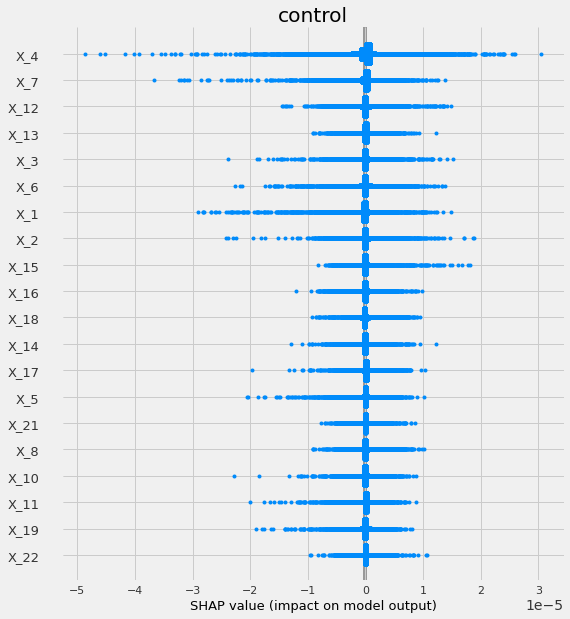

In [38]:
learner_s.plot_shap_values(X = X.values,
                          features=features,
                          tau = cate_s)

# T Learner

In [35]:
learner_t_cate = BaseTRegressor(learner=LinearRegression(), control_name='control')
cate_t = learner_t_cate.fit_predict(X = X.values,
                               treatment=treatment.values, 
                               y=y.values)

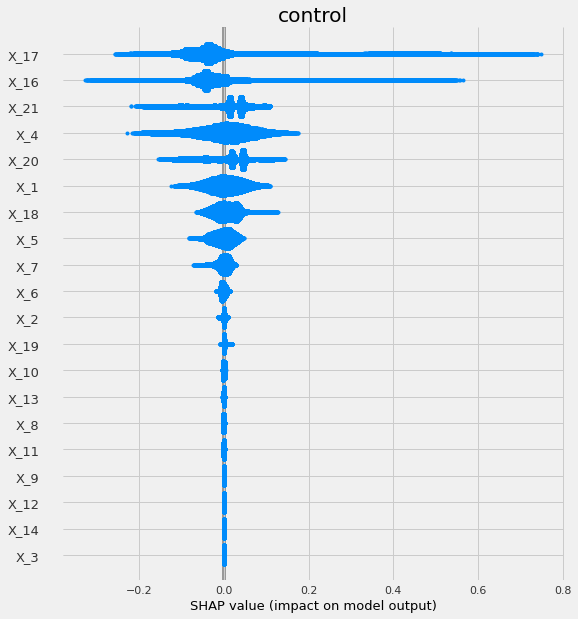

In [36]:
learner_s.plot_shap_values(X = X.values,
                          features=features,
                          tau = cate_t)

In [10]:
from IPython.display import Image
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

In [11]:
uplift_model = UpliftTreeClassifier(max_depth=7, min_samples_leaf=150, min_samples_treatment=40,
                                    n_reg=100, evaluationFunction='KL', control_name='control')

In [12]:
uplift_model.fit(df_3.iloc[:,1:23].values,
                 treatment=treatment.values,
                 y=y.values)

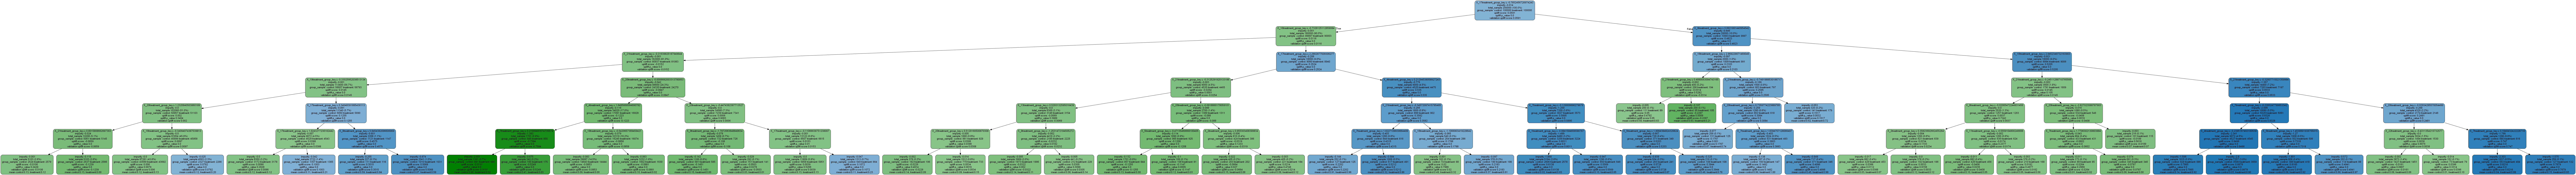

In [14]:
graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)
Image(graph.create_png())